## LIBRERÍAS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
import missingno as msno
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

## Desarrollo

In [2]:
df = pd.read_csv("Obesity Classification.csv")
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,108.0,56.046296,31.917939,1.0,28.75,56.5,83.25,110.0
Age,108.0,46.555556,24.720620,11.0,27.00,42.5,59.25,112.0
Height,108.0,166.574074,27.873615,120.0,140.00,175.0,190.00,210.0
Weight,108.0,59.490741,28.856233,10.0,35.00,55.0,85.00,120.0
BMI,108.0,20.549074,7.583818,3.9,16.70,21.2,26.10,37.2


In [5]:
df.isnull().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

<ipython-input-6-5186bca0c10e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=0.8,


<Axes: title={'center': 'Corr. Pearson'}>

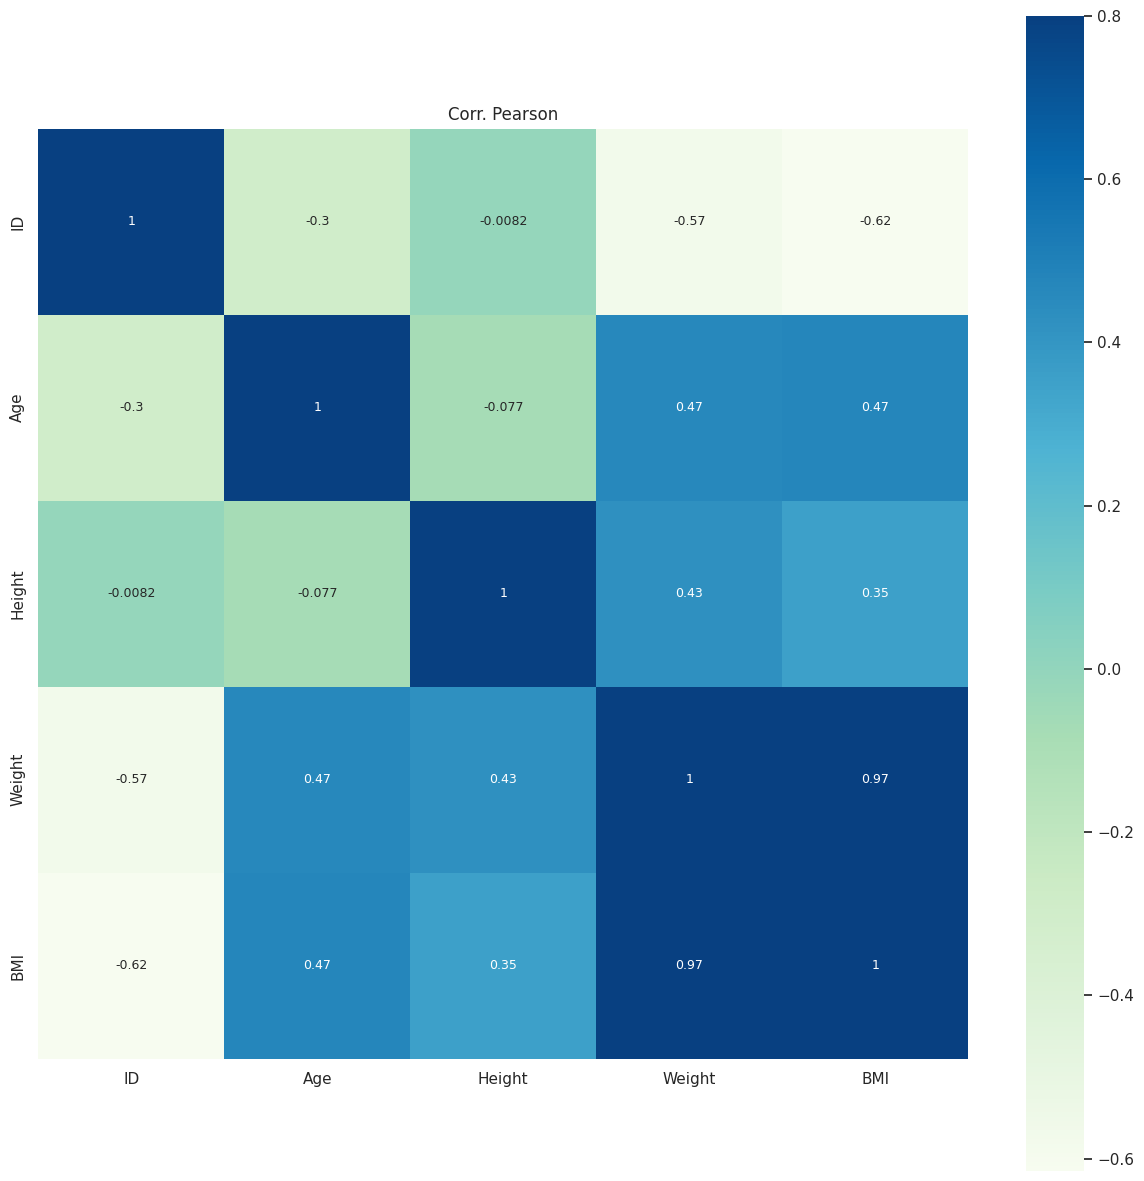

In [6]:
sns.set(style='whitegrid',font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Corr. Pearson")
sns.heatmap(df.corr(),vmax=0.8,
            square=True,cmap="GnBu",
            linecolor='r', annot=True,
            annot_kws={'size':9})

## Eliminación de Columnas

In [7]:
df = df.drop(['ID'],axis=1)
df = df.drop(['BMI'],axis=1)
df

,Age,Gender,Height,Weight,Label
0,25,Male,175,80,Normal Weight
1,30,Female,160,60,Normal Weight
2,35,Male,180,90,Overweight
3,40,Female,150,50,Underweight
4,45,Male,190,100,Obese
...,...,...,...,...,...
103,11,Male,175,10,Underweight
104,16,Female,160,10,Underweight
105,21,Male,180,15,Underweight
106,26,Female,150,15,Underweight


## Aplicar LabelEncoder a Variables no numéricas

In [8]:
#le = LabelEncoder()
#df['Gender']=le.fit_transform(df['Gender'])
#df['Label']=le.fit_transform(df['Label'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     108 non-null    int64 
 1   Gender  108 non-null    object
 2   Height  108 non-null    int64 
 3   Weight  108 non-null    int64 
 4   Label   108 non-null    object
dtypes: int64(3), object(2)
memory usage: 4.3+ KB


In [10]:
X = df.drop(['Label'],axis=1)
y = df['Label']

In [11]:
X

,Age,Gender,Height,Weight
0,25,Male,175,80
1,30,Female,160,60
2,35,Male,180,90
3,40,Female,150,50
4,45,Male,190,100
...,...,...,...,...
103,11,Male,175,10
104,16,Female,160,10
105,21,Male,180,15
106,26,Female,150,15


## Aplicación de Dummies

In [12]:
X_dummies = pd.get_dummies(X)
X_dummies

,Age,Height,Weight,Gender_Female,Gender_Male
0,25,175,80,0,1
1,30,160,60,1,0
2,35,180,90,0,1
3,40,150,50,1,0
4,45,190,100,0,1
...,...,...,...,...,...
103,11,175,10,0,1
104,16,160,10,1,0
105,21,180,15,0,1
106,26,150,15,1,0


In [13]:
y.value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

## UnderSampling

In [14]:
rus=RandomUnderSampler(random_state = 0)
X_rus, y_rus = rus.fit_resample(X_dummies,y)

In [15]:
y_rus.value_counts()

Normal Weight    12
Obese            12
Overweight       12
Underweight      12
Name: Label, dtype: int64

##OverSampling

In [16]:
ros = RandomOverSampler(random_state = 0)
X_ros, y_ros = ros.fit_resample(X_dummies,y)

In [17]:
y_ros.value_counts()

Normal Weight    47
Overweight       47
Underweight      47
Obese            47
Name: Label, dtype: int64

## Smote

In [18]:
smo = SMOTE(random_state = 0)
X_smo, y_smo = smo.fit_resample(X_dummies,y)

In [19]:
y_smo.value_counts()

Normal Weight    47
Overweight       47
Underweight      47
Obese            47
Name: Label, dtype: int64

## Evaluación

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Gender_Female'}>],
       [<Axes: title={'center': 'Gender_Male'}>, <Axes: >]], dtype=object)

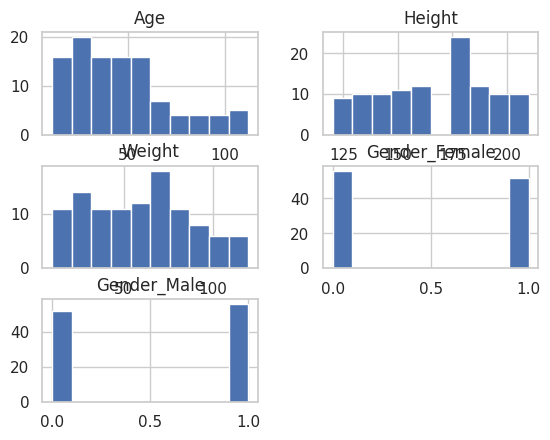

In [20]:
X_dummies.hist()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Gender_Female'}>],
       [<Axes: title={'center': 'Gender_Male'}>, <Axes: >]], dtype=object)

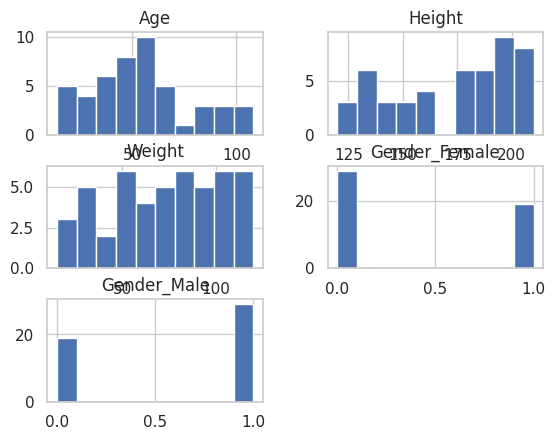

In [21]:
X_rus.hist()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Gender_Female'}>],
       [<Axes: title={'center': 'Gender_Male'}>, <Axes: >]], dtype=object)

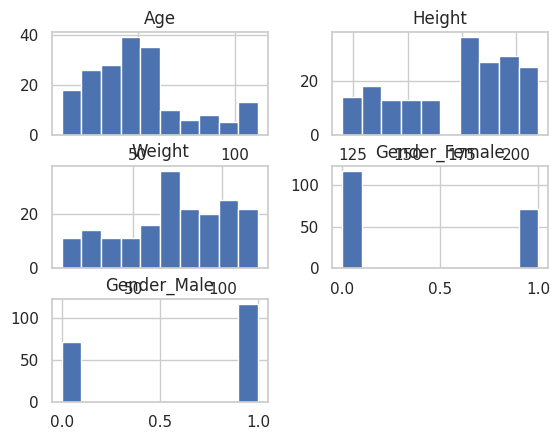

In [22]:
X_ros.hist()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Gender_Female'}>],
       [<Axes: title={'center': 'Gender_Male'}>, <Axes: >]], dtype=object)

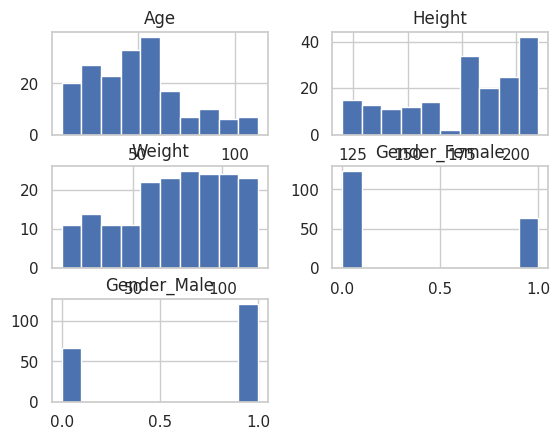

In [23]:
X_smo.hist()

## Datos Atípicos

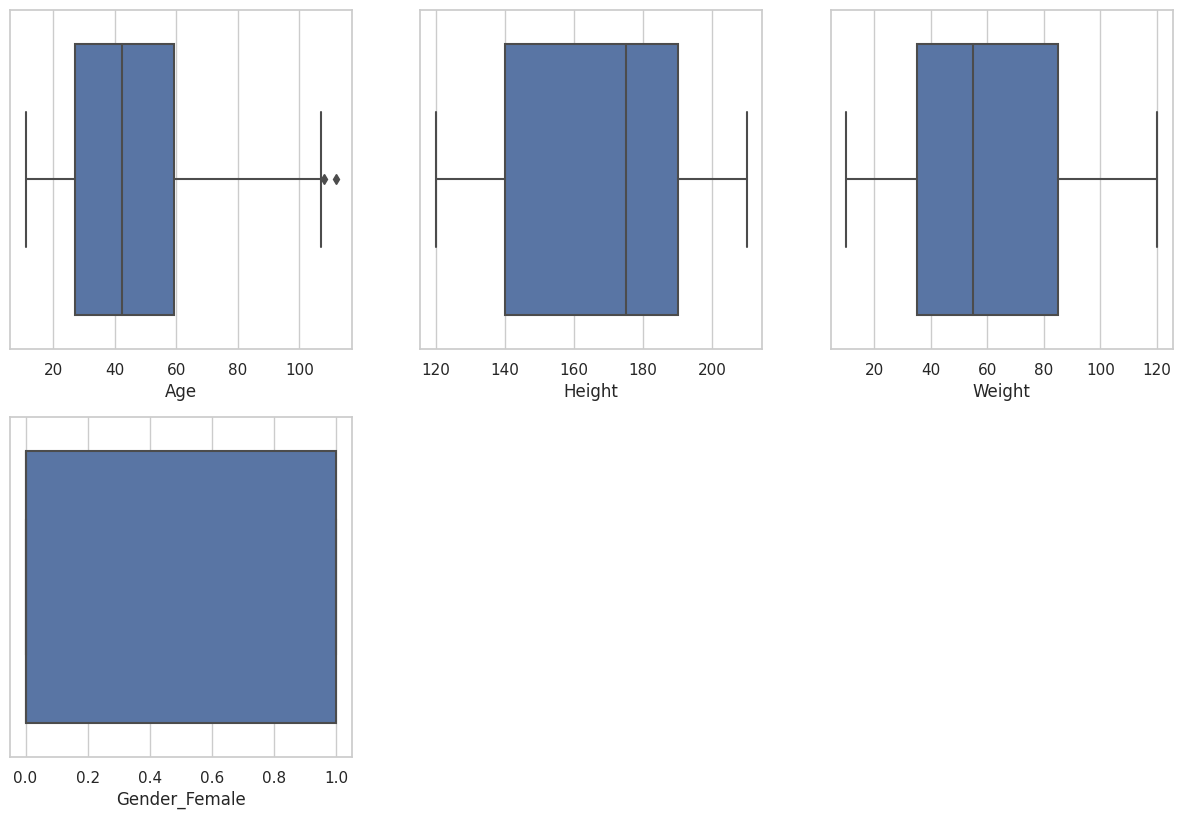

In [24]:
plt.figure(figsize=(15,15))
col = X_dummies.columns[:-1]
for i in enumerate(col):
  plt.subplot(3,3,i[0]+1)
  sns.boxplot(x=i[1],data=X_dummies)

## Modelado Normal

In [25]:
# Escalado de datos
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X_dummies)
X = scalerMinMax.transform(X_dummies)
X

array([[0.13861386, 0.61111111, 0.63636364, 0.        , 1.        ],
       [0.18811881, 0.44444444, 0.45454545, 1.        , 0.        ],
       [0.23762376, 0.66666667, 0.72727273, 0.        , 1.        ],
       [0.28712871, 0.33333333, 0.36363636, 1.        , 0.        ],
       [0.33663366, 0.77777778, 0.81818182, 0.        , 1.        ],
       [0.38613861, 0.22222222, 0.27272727, 1.        , 0.        ],
       [0.43564356, 0.88888889, 0.90909091, 0.        , 1.        ],
       [0.48514851, 0.11111111, 0.18181818, 1.        , 0.        ],
       [0.53465347, 1.        , 1.        , 0.        , 1.        ],
       [0.58415842, 0.        , 0.09090909, 1.        , 0.        ],
       [0.06930693, 0.61111111, 0.54545455, 0.        , 1.        ],
       [0.11881188, 0.44444444, 0.36363636, 1.        , 0.        ],
       [0.16831683, 0.66666667, 0.63636364, 0.        , 1.        ],
       [0.21782178, 0.33333333, 0.45454545, 1.        , 0.        ],
       [0.26732673, 0.77777778, 0.

In [26]:
y_dummies = pd.get_dummies(y)
y_dummies

,Normal Weight,Obese,Overweight,Underweight
0,1,0,0,0
1,1,0,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
103,0,0,0,1
104,0,0,0,1
105,0,0,0,1
106,0,0,0,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y_dummies,random_state=12,test_size=0.3)

In [28]:
# Modelo Neuronal
modelANN = Sequential()
modelANN.add(Dense(15, activation='relu'))
modelANN.add(Dropout(0.5))
modelANN.add(Dense(8, activation='relu'))
modelANN.add(Dense(4, activation='softmax'))

sgd = SGD(learning_rate=0.01, momentum=0.9)

modelANN.compile(optimizer = "sgd",
               loss = "categorical_crossentropy",
               metrics=['accuracy'])

In [29]:
modelANN.fit(x = X_train, y = y_train, validation_data=(X_test,y_test), batch_size=12, epochs=250, verbose=1)

Epoch 1/250
7/7 [==============================] - 1s 41ms/step - loss: 1.4882 - accuracy: 0.2000 - val_loss: 1.3770 - val_accuracy: 0.5455
Epoch 2/250
7/7 [==============================] - 0s 9ms/step - loss: 1.4366 - accuracy: 0.2667 - val_loss: 1.3714 - val_accuracy: 0.6061
Epoch 3/250
7/7 [==============================] - 0s 10ms/step - loss: 1.3904 - accuracy: 0.3600 - val_loss: 1.3687 - val_accuracy: 0.5758
Epoch 4/250
7/7 [==============================] - 0s 10ms/step - loss: 1.4098 - accuracy: 0.2800 - val_loss: 1.3644 - val_accuracy: 0.5152
Epoch 5/250
7/7 [==============================] - 0s 7ms/step - loss: 1.3822 - accuracy: 0.3467 - val_loss: 1.3618 - val_accuracy: 0.4848
Epoch 6/250
7/7 [==============================] - 0s 7ms/step - loss: 1.3868 - accuracy: 0.3867 - val_loss: 1.3579 - val_accuracy: 0.4848
Epoch 7/250
7/7 [==============================] - 0s 8ms/step - loss: 1.3858 - accuracy: 0.2933 - val_loss: 1.3577 - val_accuracy: 0.4848
Epoch 8/250
7/7 [=======

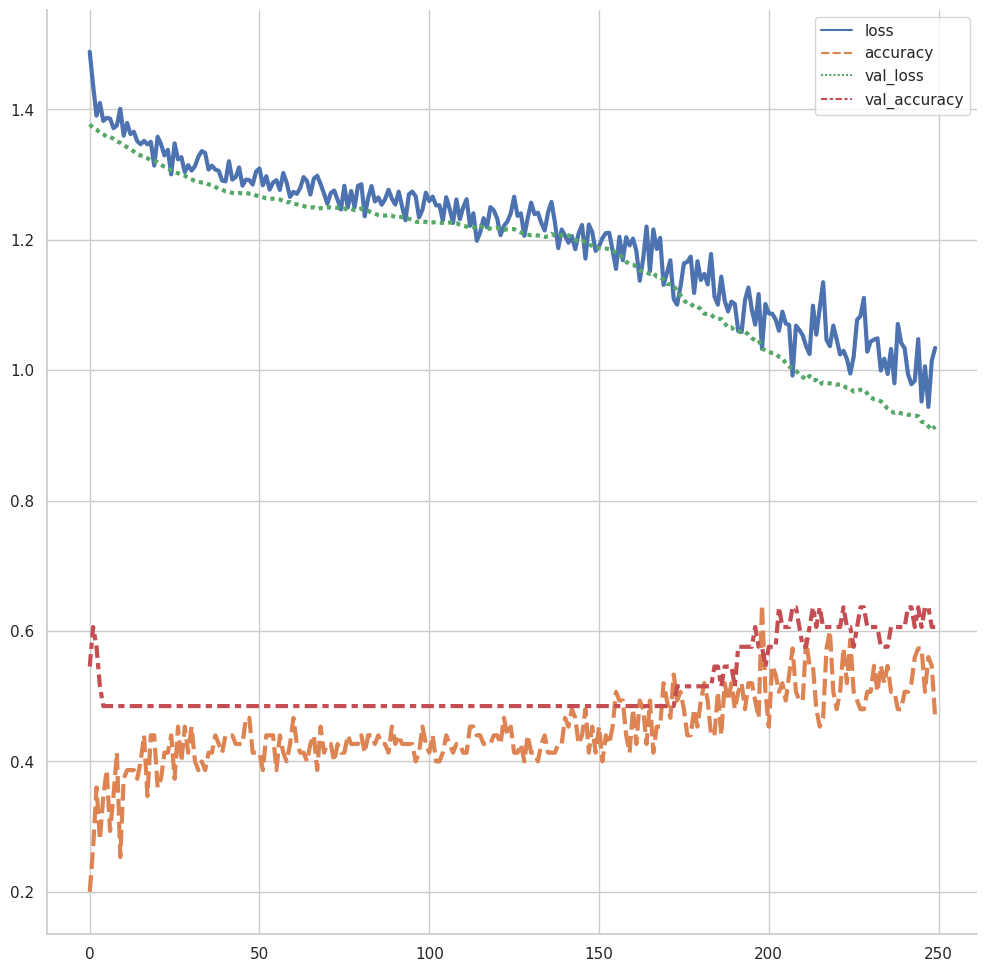

In [30]:
# Graficar la pérdida
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss, lw=3)
sns.despine()

##Modelado para UnderSampling

In [31]:
# Escalado de datos
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X_rus)
X_rus = scalerMinMax.transform(X_rus)

In [32]:
y_rus_dummies = pd.get_dummies(y_rus)

In [33]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus,y_rus_dummies,random_state=10,test_size=0.3)

In [34]:
# Modelo Neuronal
modelANN = Sequential()
modelANN.add(Dense(15, activation='relu'))
modelANN.add(Dropout(0.5))
modelANN.add(Dense(8, activation='relu'))
modelANN.add(Dense(4, activation='softmax'))

sgd = SGD(learning_rate=0.01, momentum=0.9)

modelANN.compile(optimizer = "sgd",
               loss = "categorical_crossentropy",
               metrics=['accuracy'])

In [35]:
modelANN.fit(x = X_train_rus, y = y_train_rus, validation_data=(X_test_rus,y_test_rus), batch_size=12, epochs=250, verbose=1)

Epoch 1/250
3/3 [==============================] - 1s 109ms/step - loss: 1.3992 - accuracy: 0.3333 - val_loss: 1.3556 - val_accuracy: 0.2000
Epoch 2/250
3/3 [==============================] - 0s 26ms/step - loss: 1.5137 - accuracy: 0.1818 - val_loss: 1.3533 - val_accuracy: 0.2000
Epoch 3/250
3/3 [==============================] - 0s 20ms/step - loss: 1.4575 - accuracy: 0.1818 - val_loss: 1.3523 - val_accuracy: 0.2000
Epoch 4/250
3/3 [==============================] - 0s 30ms/step - loss: 1.4404 - accuracy: 0.3333 - val_loss: 1.3515 - val_accuracy: 0.2000
Epoch 5/250
3/3 [==============================] - 0s 19ms/step - loss: 1.4822 - accuracy: 0.2424 - val_loss: 1.3501 - val_accuracy: 0.2000
Epoch 6/250
3/3 [==============================] - 0s 16ms/step - loss: 1.3762 - accuracy: 0.2121 - val_loss: 1.3492 - val_accuracy: 0.2000
Epoch 7/250
3/3 [==============================] - 0s 28ms/step - loss: 1.4595 - accuracy: 0.2121 - val_loss: 1.3475 - val_accuracy: 0.2000
Epoch 8/250
3/3 [==

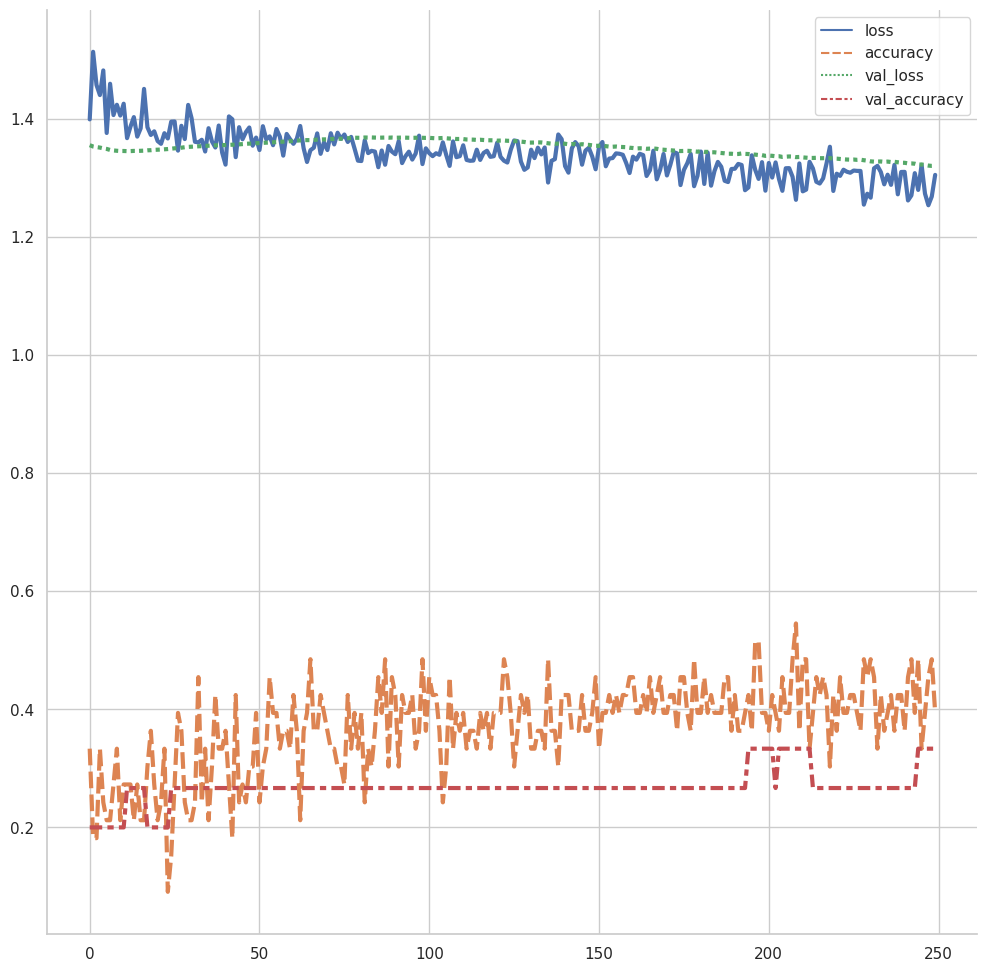

In [36]:
# Graficar la pérdida
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss, lw=3)
sns.despine()

##Modelado para UnderSampling

In [37]:
# Escalado de datos
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X_rus)
X_rus = scalerMinMax.transform(X_rus)

In [38]:
y_rus_dummies = pd.get_dummies(y_rus)

In [39]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus,y_rus_dummies,random_state=12,test_size=0.3)

In [40]:
# Modelo Neuronal
modelANN = Sequential()
modelANN.add(Dense(15, activation='relu'))
modelANN.add(Dropout(0.5))
modelANN.add(Dense(8, activation='relu'))
modelANN.add(Dense(4, activation='softmax'))

sgd = SGD(learning_rate=0.04, momentum=0.8)

modelANN.compile(optimizer = "sgd",
               loss = "categorical_crossentropy",
               metrics=['accuracy'])

In [41]:
modelANN.fit(x = X_train_rus, y = y_train_rus, validation_data=(X_test_rus,y_test_rus), batch_size=10, epochs=450, verbose=1)

Epoch 1/450
4/4 [==============================] - 1s 70ms/step - loss: 1.4716 - accuracy: 0.2727 - val_loss: 1.3904 - val_accuracy: 0.1333
Epoch 2/450
4/4 [==============================] - 0s 17ms/step - loss: 1.4754 - accuracy: 0.1818 - val_loss: 1.3872 - val_accuracy: 0.1333
Epoch 3/450
4/4 [==============================] - 0s 17ms/step - loss: 1.5099 - accuracy: 0.1212 - val_loss: 1.3843 - val_accuracy: 0.1333
Epoch 4/450
4/4 [==============================] - 0s 12ms/step - loss: 1.4747 - accuracy: 0.1818 - val_loss: 1.3806 - val_accuracy: 0.0667
Epoch 5/450
4/4 [==============================] - 0s 12ms/step - loss: 1.4686 - accuracy: 0.1515 - val_loss: 1.3791 - val_accuracy: 0.0667
Epoch 6/450
4/4 [==============================] - 0s 17ms/step - loss: 1.4259 - accuracy: 0.3030 - val_loss: 1.3754 - val_accuracy: 0.0667
Epoch 7/450
4/4 [==============================] - 0s 11ms/step - loss: 1.4378 - accuracy: 0.1818 - val_loss: 1.3738 - val_accuracy: 0.1333
Epoch 8/450
4/4 [===

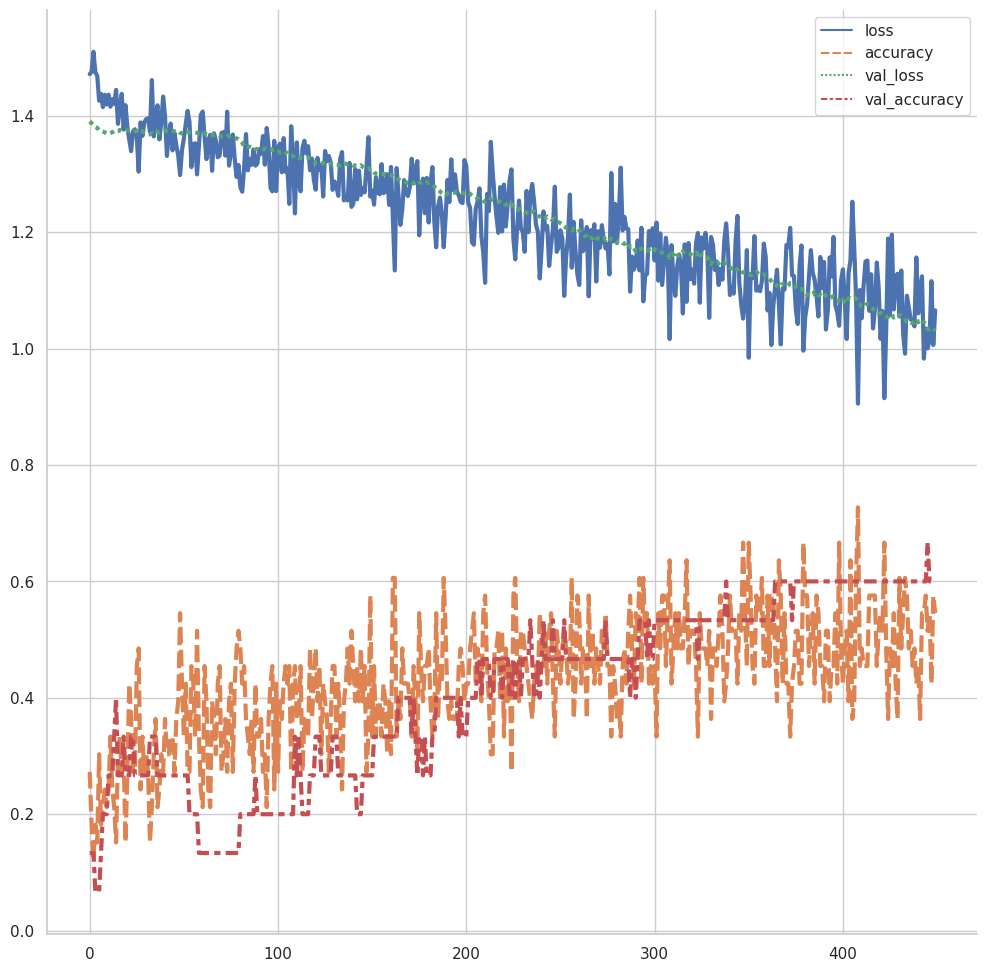

In [42]:
# Graficar la pérdida
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss, lw=3)
sns.despine()

##Modelado para Smote

In [43]:
# Escalado de datos
scalerMinMax = MinMaxScaler()
scalerMinMax.fit(X_smo)
X_smo = scalerMinMax.transform(X_smo)

In [44]:
y_smo_dummies = pd.get_dummies(y_smo)

In [100]:
X_train_smo, X_test_smo, y_train_smo, y_test_smo = train_test_split(X_smo,y_smo_dummies,random_state=10,test_size=0.3)

In [104]:
# Modelo Neuronal
modelANN = Sequential()
#modelANN.add(Dense(15, activation='relu'))
#modelANN.add(Dropout(0.2)) #aumentar
modelANN.add(Dense(5, activation='relu')) #5 solo dos capas
modelANN.add(Dense(4, activation='softmax'))

sgd = SGD(learning_rate=0.008, momentum=0.85)

modelANN.compile(optimizer = sgd,
               loss = "categorical_crossentropy",
               metrics=['accuracy'])

In [ ]:
modelANN.fit(x = X_train_smo, y = y_train_smo, validation_data=(X_test_smo,y_test_smo), batch_size=12, epochs=400, verbose=1)

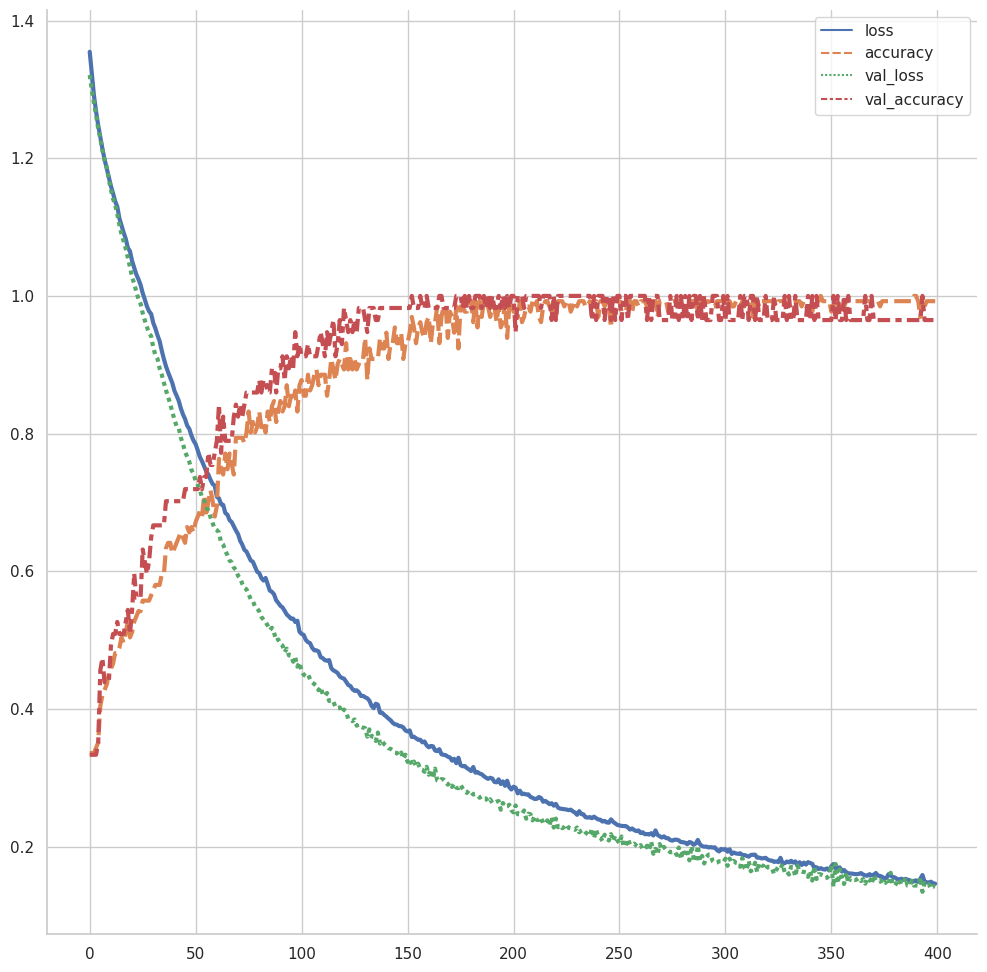

In [107]:
# Graficar la pérdida
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss, lw=3)
sns.despine()